In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('data/final_dataset.csv', parse_dates=['order_purchase_timestamp'])
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_item_price,customer_id,order_purchase_timestamp,customer_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,RJ,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83,f6dd3ec061db4e3987629fe6b26e5cce,2017-04-26 10:53:06,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87,6489ae5e4333f3693df5ad4372dab6d3,2018-01-14 14:33:31,MG,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78,d4eb9395c8c0431ee92fce09860c5a06,2018-08-08 10:00:35,SP,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04,58dbd0b2d70206bf40e62cd34e84d795,2017-02-04 13:57:51,SP,garden_tools


Datetime conversion is performed after loading the CSV,
as CSV does not preserve datetime types.

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112101 entries, 0 to 112100
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112101 non-null  object        
 1   order_item_id                  112101 non-null  int64         
 2   product_id                     112101 non-null  object        
 3   seller_id                      112101 non-null  object        
 4   shipping_limit_date            112101 non-null  object        
 5   price                          112101 non-null  float64       
 6   freight_value                  112101 non-null  float64       
 7   total_item_price               112101 non-null  float64       
 8   customer_id                    112101 non-null  object        
 9   order_purchase_timestamp       112101 non-null  datetime64[ns]
 10  customer_state                 112101 non-null  object        
 11  

In [29]:
df.duplicated().sum()

np.int64(0)

In [49]:
df['order_day'] = df['order_purchase_timestamp'].dt.day_name()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112101 entries, 0 to 112100
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112101 non-null  object        
 1   order_item_id                  112101 non-null  int64         
 2   product_id                     112101 non-null  object        
 3   seller_id                      112101 non-null  object        
 4   shipping_limit_date            112101 non-null  object        
 5   price                          112101 non-null  float64       
 6   freight_value                  112101 non-null  float64       
 7   total_item_price               112101 non-null  float64       
 8   customer_id                    112101 non-null  object        
 9   order_purchase_timestamp       112101 non-null  datetime64[ns]
 10  customer_state                 112101 non-null  object        
 11  

# EDA - Exploratory Data Analysis

In [33]:
total_orders = df['order_id'].nunique()
total_customers = df['customer_id'].nunique()
total_revenue = df['total_item_price'].sum()
date_range = (df['order_purchase_timestamp'].min(), df['order_purchase_timestamp'].max())

In [34]:
print("Total orders: ", total_orders)
print("Total customers: ", total_customers)
print("Total revenue: ", total_revenue)
print("Total range: ", date_range)

Total orders:  98199
Total customers:  98199
Total revenue:  15735527.030000001
Total range:  (Timestamp('2016-09-04 21:15:19'), Timestamp('2018-09-03 09:06:57'))


# Sales Trend Analysis

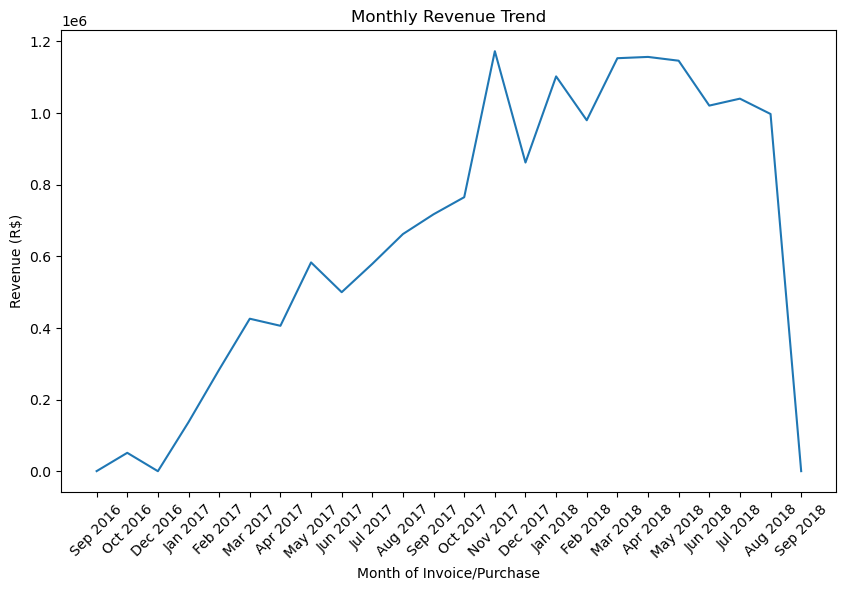

In [54]:
monthly_sales = (
    df.groupby(df['order_purchase_timestamp'].dt.to_period('M'))['total_item_price'].sum().reset_index()
)

monthly_sales['order_purchase_timestamp'] = monthly_sales['order_purchase_timestamp'].apply(lambda x: pd.to_datetime(str(x)).strftime('%b %Y'))


plt.figure(figsize=(10,6))
sns.lineplot(
    data=monthly_sales,
    x='order_purchase_timestamp',
    y='total_item_price'
)
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month of Invoice/Purchase')
plt.ylabel('Revenue (R$)')
plt.show()

This line chart visualizes the Total Revenue generated each month from September 2016 to September 2018. It helps us identify growth patterns and seasonal peaks.


-- There is a consistent upward trend in sales starting from early 2017, showing that the platform gained popularity over time.

-- Post-November 2017, the revenue maintained a high baseline (around R$ 1M per month) throughout 2018.

-- The sudden drop in September 2018 is due to the dataset ending, not a business failure.

# Top Performaing Categories

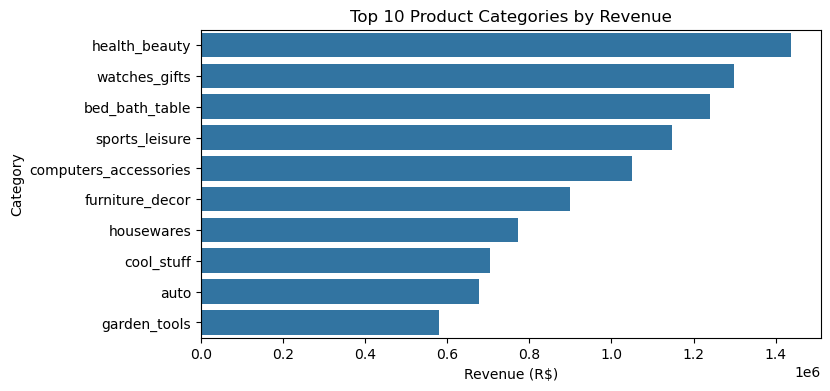

In [55]:
category_sales = (
    df.groupby('product_category_name_english')['total_item_price'].sum().sort_values(ascending=False).head(10)
)

plt.figure(figsize=(8,4))
sns.barplot(
    x=category_sales.values,
    y=category_sales.index
)
plt.title('Top 10 Product Categories by Revenue')
plt.xlabel('Revenue (R$)')
plt.ylabel('Category')
plt.show()

This bar chart highlights the categories that contribute the most to the total sales value. It helps identify which types of products are the primary "Revenue Drivers" for the business.


-- Health & Beauty is the leading category, generating the highest revenue (over R$ 1.4M).

-- The top 10 list shows a healthy mix of personal care, home improvement, and hobby-related items, indicating a well-rounded marketplace.

# Geographic Analysis

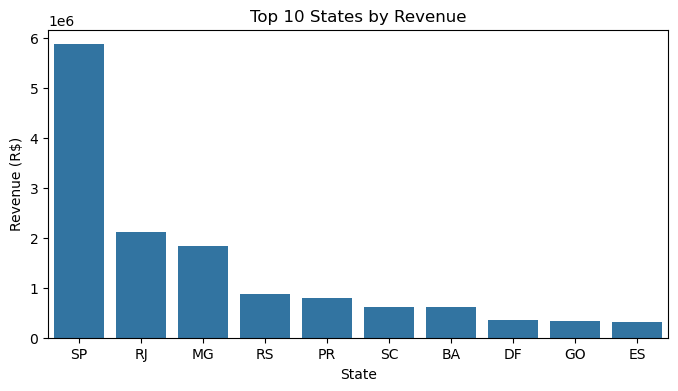

In [57]:
state_sales = (
    df.groupby('customer_state')['total_item_price'].sum().sort_values(ascending=False).head(10)
)

plt.figure(figsize=(8,4))
sns.barplot(
    x=state_sales.index,
    y=state_sales.values
)
plt.title('Top 10 States by Revenue')
plt.xlabel('State')
plt.ylabel('Revenue (R$)')
plt.show()

This bar chart shows the geographical distribution of sales across different Brazilian states. It helps us understand which regions are the biggest markets for Olist.


-- SP (São Paulo) is far ahead of all other states, contributing nearly R$ 6M in revenue. 

-- RJ (Rio de Janeiro) and MG (Minas Gerais) follow as the next biggest markets, each contributing around R$ 2M.

-- There is a significant revenue gap between the top 3 states and the rest, indicating that e-commerce activity is highly concentrated in the Southeast region of Brazil.

# Day-of-Week Sales Pattern

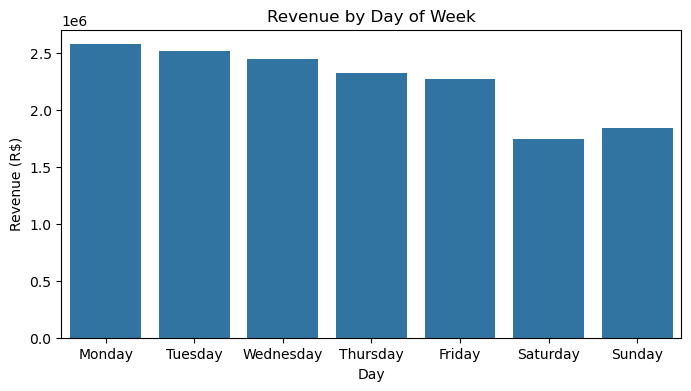

In [58]:
day_of_week_sales = (
    df.groupby('order_day')['total_item_price'].sum().reindex([
          'Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'
      ])
)

plt.figure(figsize=(8,4))
sns.barplot(
    x=day_of_week_sales.index,
    y=day_of_week_sales.values
)
plt.title('Revenue by Day of Week')
plt.xlabel('Day')
plt.ylabel('Revenue (R$)')
plt.show()

This plot shows which days of the week generate the most revenue. It helps in understanding customer shopping behavior and planning marketing activities.


-- Revenue is highest on Mondays and gradually decreases as the week progresses. This suggests that customers prefer to place orders at the start of the work week.

-- There is a noticeable drop in revenue during the weekends, with Saturday being the slowest day for sales.

-- Sales start to pick up slightly on Sunday.